## Lagrange interpolation

Given $(n+1)$ distinct points $\{q_i\}_{i=0}^n$ in the interval $[0,1]$,
we define the *Lagrange interpolation* operator $\mathcal{L}^n$ the operator
$$
\mathcal{L}^n : C^0([0,1]) \mapsto \mathcal{P}^n
$$
which satisfies
$$
(\mathcal{L}^n f)(q_i) = f(q_i), \qquad i=0,\dots,n.
$$

This operator is used to approximate the infinitely dimensional space $C^0([0,1])$ with a
finite dimensional one, $\mathcal{P}^n$, which is the space of polynomials of order n. 

Such a space has dimension $n+1$, and can be constructed using linear combinations of 
monomials of order $\leq n$:

$$
\mathcal{P}^n = \text{span}\{p_i := x^i\}_{i=0}^{n}
$$

Let's start by importing the usual suspects:

In [2]:
%matplotlib inline
from numpy import *
from pylab import *

In what follows, we will plot several functions in the interval $[0,1]$, 
so we start by defining a linear space used for plotting. As a good habit, 
we choose a number of points which would generate intervals that are 
exactly representable in terms of a binary base.

[  0.00000000e+00   9.76562500e-04   1.95312500e-03 ...,   9.98046875e-01
   9.99023438e-01   1.00000000e+00] 1025
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Pn[i]is [ 1.  1.  1. ...,  1.  1.  1.]
Pn[i]is [  0.00000000e+00   9.76562500e-04   1.95312500e-03 ...,   9.98046875e-01
   9.99023438e-01   1.00000000e+00]
Pn[i]is [  0.00000000e+00   9.53674316e-07   3.81469727e-06 ...,   9.96097565e-01
   9.98047829e-01   1.00000000e+00]
Pn[i]is [  0.00000000e+00   9.31322575e-10   7.45058060e-09 ...,   9.94152062e-01
   9.97073173e-01   1.00000000e+00]
Pn[i]is [  0.00000000e+00   9.09494702e-13   1.45519152e-11 ...,   9.92210358e-01
   9.96099468e-01   1.00000000e+00]
Pn[i]is [  0.00000000e+00   8.88178420e-16   2.84217094e-14 ...,   9.90272448e-01
   9.95126715e-01   1.00000000e+00]
Pn[i]is [  0.00000000e+00   8.67361738e-19   5.55111512e

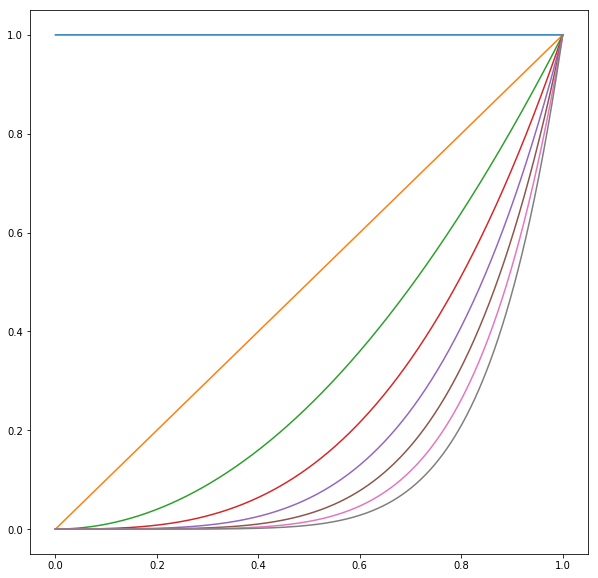

In [3]:
ref = 1025 # So that x_i+1 - x_i is exactly representable in base 2

x = linspace(0,1,ref)
print(x, len(x))
n = 7 # Polynomials of order 5, with dimension 6


# We store the basis of Pn row-wise. This is memory efficient if we want to access
# all the values of the basis at once
Pn = zeros((n+1, len(x)))
print(Pn)
for i in range(n+1):
    Pn[i] = x**i
    print ('Pn[i]is',Pn[i])

# The _ = in front of the plot command is only there to ignore the output of the plot
# command
figure(figsize=[10,10])
_ = plot(x, Pn.T)


If we want to construct the Lagrange interpolation of a given function on $n+1$ equispaced points in 
$[0,1]$, then we are actively looking for an element of $\mathcal{P}^n$ that coincides with the function
at these given points.

Given a basis $\{p_i\}_{i=0}^n$, any element of $\mathcal{P}^n$ can be written as a linear combination of 
the basis, i.e., 

$$
\forall u \in \mathcal{P}^n, \quad  \exists! \{u^i\}_{i=0}^n  \quad| \quad u(x) = \sum_{i=0}^n u^i p_i(x)
$$

in what follows, we'll use [Einstein summation convention](https://en.wikipedia.org/wiki/Einstein_notation), and 
call $u$ both the function of $\mathcal{P}^n$, or the $R^{n+1}$ vector representing its coefficients. 

**Remark on the notation**

We use upper indices to indicate both "contravariant" coefficients and the *canonical basis of the dual space*, 
i.e., the linear functionals in $(\mathcal{P}^n)^*$ such that 

$$
(\mathcal{P}^n)^* := \text{span}\{p^i\}_{i=0}^{n} \qquad | \qquad p^i(p_j) = \delta^i_j\qquad i,j = 0, \ldots, n
$$

With this notation, we have that the coefficients of a polynomial are uniquely determined by

$$
u^i = p^i(u)
$$

where the $u$ on the right hand side is an element of $\mathcal{P}^n$ (not its coefficients).

If we want to solve the interpolation problem above, then we need to find the coefficients $u^i$ of the 
polynomial $u$ that interpolates $f$ at the points $q_i$:

$$
p_j(q_i) u^j = f(q_i)
$$

(Remember Einstein summation convention)

This can be written as a linear problem $A u = F$, with system matrix $A_{ij} :=  p_j(q_i)$ and right 
hand side $F_i = f(q_i)$.

q--- [ 0.          0.14285714  0.28571429  0.42857143  0.57142857  0.71428571
  0.85714286  1.        ]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   1.42857143e-01   2.04081633e-02   2.91545190e-03
    4.16493128e-04   5.94990183e-05   8.49985975e-06   1.21426568e-06]
 [  1.00000000e+00   2.85714286e-01   8.16326531e-02   2.33236152e-02
    6.66389005e-03   1.90396858e-03   5.43991024e-04   1.55426007e-04]
 [  1.00000000e+00   4.28571429e-01   1.83673469e-01   7.87172012e-02
    3.37359434e-02   1.44582614e-02   6.19639776e-03   2.65559904e-03]
 [  1.00000000e+00   5.71428571e-01   3.26530612e-0

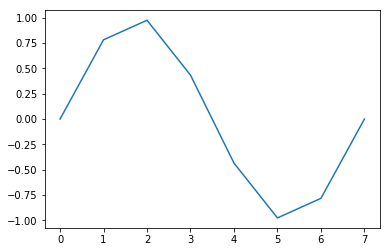

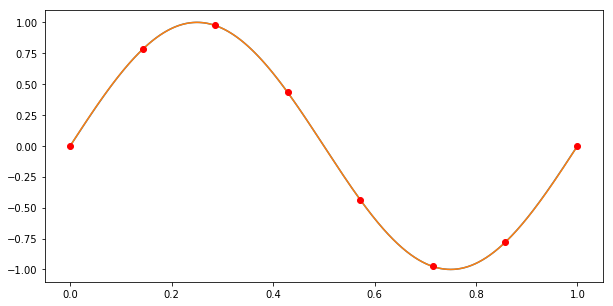

In [4]:
# The interpolation points
q = linspace(0,1,n+1)
print('q---', q)

A = zeros((n+1, n+1))
print(A)

for j in range(n+1):
    A[:,j] = q**j
print(A)

# The interpolation function
f = lambda x: sin(2*pi*x)

# The right hand side
F = f(q)

print ('F is', F)
plot(F)

# The coefficients
u = linalg.solve(A, F)

print('u is', u)

# Make a nice looking plot
figure(figsize=[10,5])
_ = plot(x, f(x))
_ = plot(x, Pn.T.dot(u))
_ = plot(q, f(q), 'ro')

Is this a good way to proceed with the interpolation? How about the condition number of $A$? Is it good?

Let's try with an increasing number of points (and degrees):

In [38]:
for i in range(3,15):
    qtmp = linspace(0,1,i)
    Atmp = zeros((i,i))
    for j in range(i):
        Atmp[:,j] = qtmp**j
        
    print("Condition number: (n=", i, ":", linalg.cond(Atmp))


Condition number: (n= 3 : 15.0996577225
Condition number: (n= 4 : 98.8677385072
Condition number: (n= 5 : 686.434941819
Condition number: (n= 6 : 4924.37105661
Condition number: (n= 7 : 36061.1608802
Condition number: (n= 8 : 267816.700908
Condition number: (n= 9 : 2009396.38002
Condition number: (n= 10 : 15193229.6772
Condition number: (n= 11 : 115575244.508
Condition number: (n= 12 : 883478685.733
Condition number: (n= 13 : 6780588427.12
Condition number: (n= 14 : 52214930592.0


As we see, the condition number of this matrix explodes as n increases. Since the interpolation problem 
reduces to solving the matrix constructed as $A_{ij} := p_j(x_i)$, one way to ensure a good condition number
is to choose the basis such that $A$ is the identity matrix, i.e., to choose the basis such that $p_j(x_i) = \delta_{ij}$. Such a basis is called the **Lagrange basis**, and it is constructed explicitly as:


$$
l^n_i(x) := \prod_{j=0, j\neq i}^n \frac{(x-x_j)}{(x_i-x_j)}  \qquad
i = 0, \dots, n
$$

With this basis, no matrix inversion is required, and we can simply write the Lagrange interpolation as
$$
\mathcal{L}^n f := \sum_{i=0}^n f(x_i) l^n_i(x),
$$

> Given a set of $(n+1)$ distinct points
> $\{x_i\}_{i=0}^n$ , there exist a unique Lagrange interpolation of order
> $n$.

Ln is [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
len x is 1025
Lagrange is [[  1.00000000e+00   9.82396720e-01   9.65034393e-01 ...,   1.88852132e-03
    9.60309599e-04  -0.00000000e+00]
 [  0.00000000e+00   4.73327820e-02   9.36370006e-02 ...,  -1.54279560e-02
   -7.84380630e-03   0.00000000e+00]
 [ -0.00000000e+00  -7.07556677e-02  -1.39488747e-01 ...,   5.55660227e-02
    2.82441459e-02  -0.00000000e+00]
 ..., 
 [  0.00000000e+00   2.82441459e-02   5.55660227e-02 ...,  -1.39488747e-01
   -7.07556677e-02   0.00000000e+00]
 [ -0.00000000e+00  -7.84380630e-03  -1.54279560e-02 ...,   9.36370006e-02
    4.73327820e-02  -0.00000000e+00]
 [  0.00000000e+00   9.60309599e-04   1.88852132e-03 ...,   9.65034393e-01
    9.82396720e-01   1.00000000e+00]]


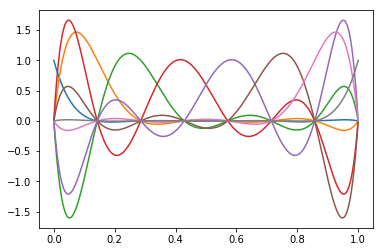

In [61]:
Ln = zeros((n+1, len(x)))
print('Ln is',Ln)
print('len x is',len(x))

for i in range(n+1):
    Ln[i] = product([ (x-q[j])/(q[i]-q[j]) for j in range(n+1) if j != i], axis=0)
print('Lagrange is', Ln)

_ = plot(x,Ln.T)

Now the interpolation in the sampling points is simply:

dot [  0.00000000e+00   5.11971707e-03   1.02646764e-02 ...,  -1.02646764e-02
  -5.11971707e-03  -2.44929360e-16]


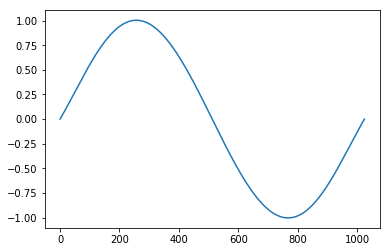

In [57]:
y =Ln.T.dot(f(q))
# Ln.T.dot(f(q))
print('dot', y)
_ = plot( y)
#print('fq',f(q))
#print('y is', y)

#figure(figsize=[10,5])
#_ = plot(x, f(x))
#_ = plot(x, y)
#_ = plot(q, f(q), 'ro')

Let's try different functions:

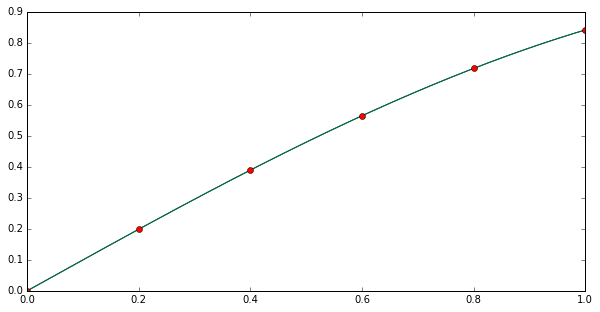

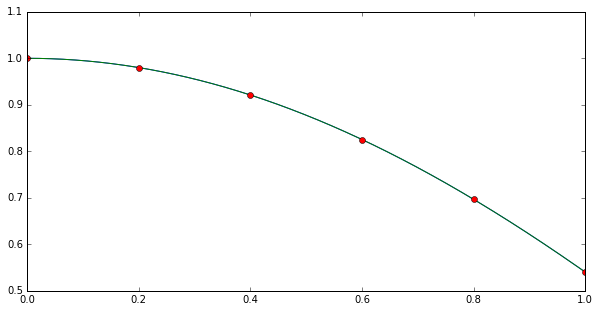

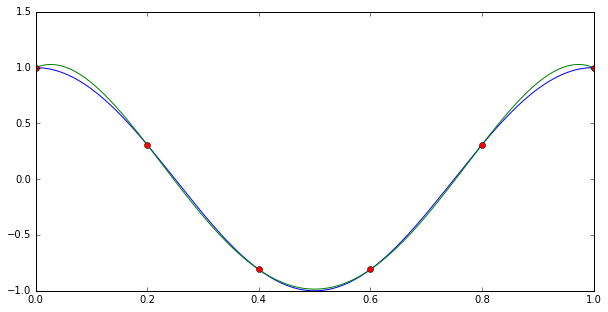

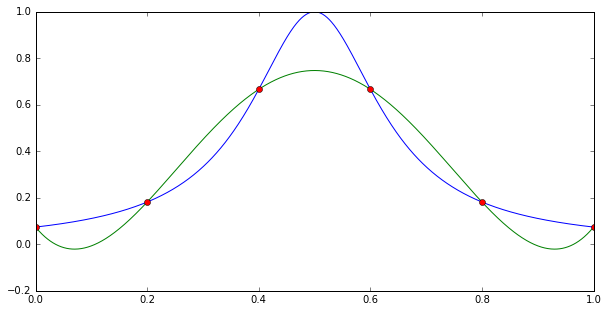

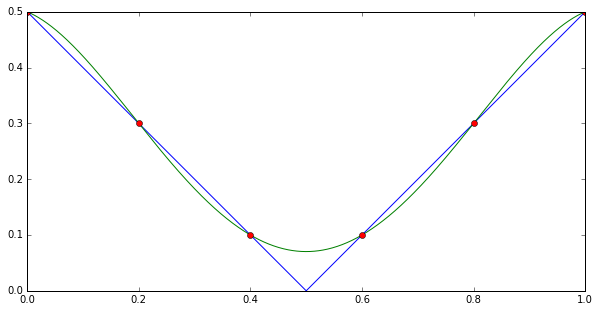

In [7]:
# A little "macro". This assumes Ln, q, and x are all defined
# Notice: technically this is a python function. However, it 
# expects symbols and variables to be defined in the global scope
# and this is **not** good programming style. It may be very 
# useful and fast at times, but try not to overdo it.
#
# I'd call it a function if internally it did not use any globally
# defined variable.

def my_plot(f):
    figure(figsize=[10,5])
    y = Ln.T.dot(f(q))
    _ = plot(x, f(x))
    _ = plot(x, y)
    _ = plot(q, f(q), 'ro')
    show()

my_plot(sin)
my_plot(cos)

# When we need something more complicated than simply cos, or sin, 
# we can use "on the fly" function definitions, or lambda functions:
my_plot(lambda x: cos(2*pi*x))

# Lambda functions can be assigned too, for convenience and later 
# reuse...
runge = lambda x: 1.0/(1+50*(.5-x)**2)
my_plot(runge)

# Alternatively, you can define the function in the classical pythonic
# way:
def shifted_abs(x):
    return abs(x-.5)

my_plot(shifted_abs)